In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
# missing info in ph, Sulfate, Trihalomethanes columns
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
#fraction of data missing in these columns
df.isnull().sum()/len(df)
#we'll have to handle these missing values before training any learning model

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
# 61% to 39% split between true and false values of target variable
df['Potability'].value_counts(normalize = True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

In [10]:
# skew of data features
df.drop('Potability', axis = 1).skew()
# data is close to normally distributed

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

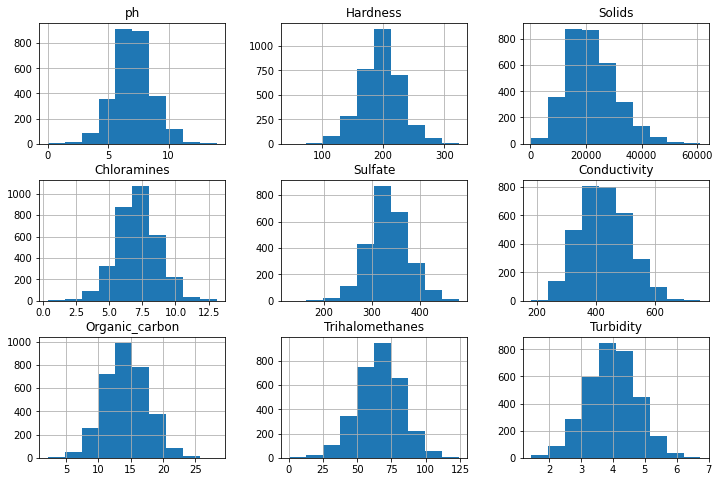

In [11]:
df.drop('Potability', axis = 1).hist(figsize = (12,8))
# solids are skewed towards lower concentration as expected

<AxesSubplot:>

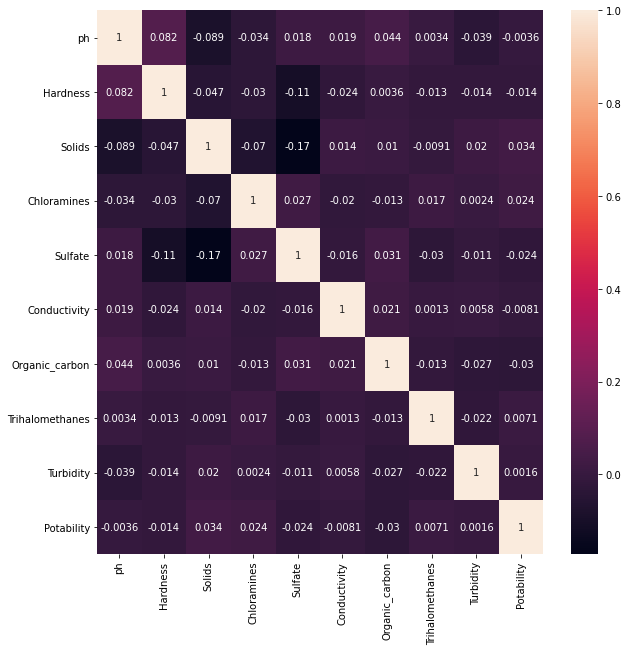

In [12]:
#correlation exploration between data features
plt.figure(figsize= (10,10))
sns.heatmap(df.corr(), annot= True)
# no strong correlation between data features
# no need to proceed further with exploratory data analysis

In [13]:
#recall fraction of data missing in ph, Sulfate and Trihalomethanes column
df.isnull().sum()/len(df)

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [14]:
#There's quite a bit of variablilty in the features of the data
# first let's scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Potability', axis = 1))

StandardScaler()

In [15]:
scaled_feat = scaler.transform(df.drop('Potability', axis = 1))
df_feat = pd.DataFrame(scaled_feat, columns = df.columns[:-1])
df_feat.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,0.259195,-0.139471,0.112415,0.838973,1.708954,-1.180651,1.273445,-1.286298
1,-2.110818,-2.036414,-0.385987,-0.307694,NaN,2.062575,0.270597,-0.622493,0.684218
2,0.638838,0.847665,-0.240047,1.360594,NaN,-0.094032,0.781117,0.001472,-1.167365
3,0.775374,0.547651,0.000493,0.592008,0.558106,-0.778830,1.255134,2.098969,0.848412
4,1.261849,-0.464429,-0.460249,-0.363698,-0.570898,-0.343939,-0.824357,-2.126974,0.138786


In [16]:
#we'll use scikit learn's SimpleImputer to imput the missing values 
# first perform a train-test split
X = df_feat
y = df['Potability']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
# making sure X_train dataset reflects features in the entire dataset
X_train.isnull().sum()/len(X_train)

ph                 0.153511
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.241169
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.052769
Turbidity          0.000000
dtype: float64

In [20]:
X_train.skew()

ph                 0.024576
Hardness          -0.070337
Solids             0.571355
Chloramines        0.032796
Sulfate           -0.037366
Conductivity       0.248044
Organic_carbon    -0.034525
Trihalomethanes   -0.076002
Turbidity          0.005499
dtype: float64

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

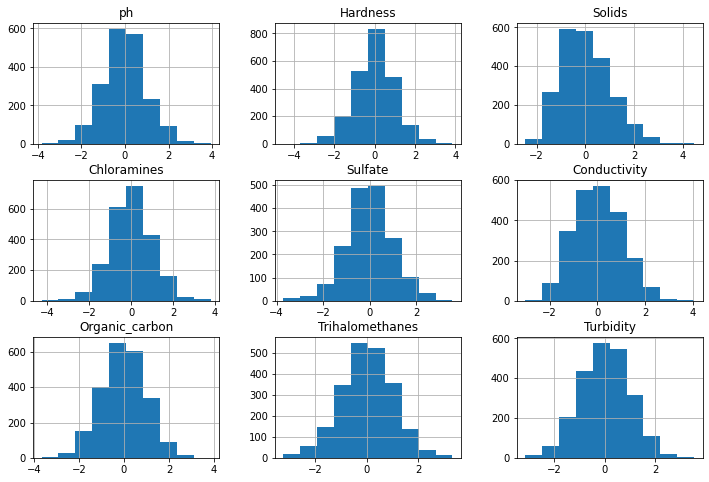

In [21]:
X_train.hist(figsize=(12,8))

In [22]:
#X_train dataset reflects entire dataset. Now to impute the missing values in the dataset
#with scikit learn's SimpleImputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [23]:
X_train = pd.DataFrame(X_train, columns = df.columns[:-1])
X_test = pd.DataFrame(X_test, columns = df.columns[:-1])

In [24]:
X_train.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,-0.007355,-0.000601,0.013966,0.003092,-0.010143,0.013612,-0.011927,0.014940,0.016516
std,0.906070,0.985772,1.006566,1.004478,0.876403,0.994515,0.987889,0.969220,0.993631
min,-3.830043,-4.530454,-2.474344,-4.277288,-3.708632,-3.028290,-3.653635,-3.218638,-3.166476
25%,-0.501756,-0.595884,-0.732001,-0.631993,-0.398361,-0.734943,-0.669515,-0.583670,-0.672420
50%,-0.014185,0.007498,-0.100123,0.006294,-0.021537,-0.031919,-0.012576,0.019708,-0.000676
75%,0.493937,0.614308,0.646546,0.628913,0.390590,0.695938,0.668183,0.657552,0.702793
max,3.932850,3.855680,4.472689,3.793631,3.556147,4.048144,3.846147,3.316375,3.552921


In [25]:
X_train.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [26]:
# we've successfully imputed the missing data values and thereby have retained 
# more of the dataset

# Training models

In [27]:
# In classifying water as potable, we'll compare three classification models:
# Logistic Regression, Decision Tree Classifier and Random Forest Classifier. 

# Logistic Regression

In [28]:
# importing, imputing and training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [29]:
# accessing model performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, lr_preds))
print('\n')
print(confusion_matrix(y_test, lr_preds))
# many false positives here

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       603
           1       0.00      0.00      0.00       380

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.38      0.61      0.47       983



[[603   0]
 [380   0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [30]:
# importing, imputing and training model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_preds = dtc.predict(X_test)

In [31]:
# accessing model performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, dtc_preds))
print('\n')
print(confusion_matrix(y_test, dtc_preds))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       603
           1       0.48      0.49      0.48       380

    accuracy                           0.59       983
   macro avg       0.57      0.57      0.57       983
weighted avg       0.60      0.59      0.59       983



[[399 204]
 [195 185]]


# Random Forest Classifier

In [32]:
# importing, imputing and training model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, rfc_preds))
print('\n')
print(confusion_matrix(y_test, rfc_preds))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       603
           1       0.65      0.36      0.46       380

    accuracy                           0.68       983
   macro avg       0.67      0.62      0.61       983
weighted avg       0.67      0.68      0.65       983



[[529  74]
 [244 136]]


# K Nearest Neighbors

In [36]:
# importing, imputing and training model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn_preds))
print('\n')
print(confusion_matrix(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73       603
           1       0.54      0.36      0.43       380

    accuracy                           0.63       983
   macro avg       0.60      0.58      0.58       983
weighted avg       0.62      0.63      0.62       983



[[488 115]
 [244 136]]


In [38]:
#Finding optimal K value
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

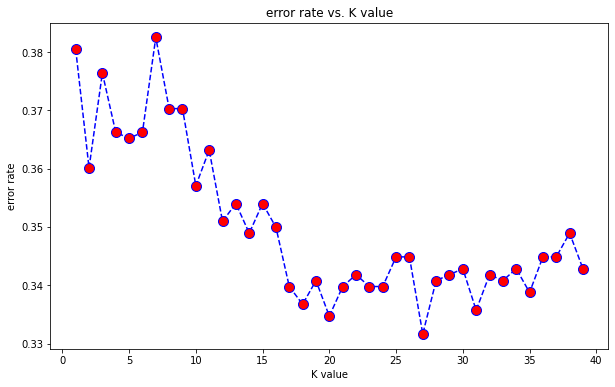

In [39]:
plt.figure(figsize = (10, 6))
plt.plot(range(1,40), error_rate, color = 'b', linestyle = '--', marker = 'o', markerfacecolor = 'r', markersize = 10)
plt.title('error rate vs. K value')
plt.xlabel('K value')
plt.ylabel('error rate')
sns.set_style('whitegrid')

# looks like K = 20 is a good fit

In [40]:
# importing, imputing and training model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn_preds))
print('\n')
print(confusion_matrix(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78       603
           1       0.71      0.22      0.34       380

    accuracy                           0.67       983
   macro avg       0.69      0.58      0.56       983
weighted avg       0.68      0.67      0.61       983



[[569  34]
 [295  85]]


# Random Forest Classifier or Optimized K -Nearest Neighbors wins out here.